In [3]:
import tensorflow as tf
import keras_cv
import tensorflow_datasets as tfds
import time


# Load backbone
backbone = keras_cv.models.EfficientNetV2Backbone.from_preset(
    "efficientnetv2_b0_imagenet", include_rescaling=True
)
backbone.trainable = False

# Build RetinaNet model
model = keras_cv.models.RetinaNet(
    num_classes=20,  # Pascal VOC has 20 classes
    bounding_box_format="xywh",
    backbone=backbone,
)

# Compile
model.compile(
    optimizer="adam",
    classification_loss="focal",
    box_loss="smoothl1"
)

# Create a dummy dataset of 100 samples
def dummy_dataset(batch_size=4, num_batches=25):
    def _generator():
        for _ in range(num_batches):
            # Random images (224x224x3), adjust to your input size if needed
            images = np.random.rand(batch_size, 224, 224, 3).astype("float32")

            # Dummy bounding boxes: [x, y, w, h]
            boxes = np.random.rand(batch_size, 5, 4).astype("float32")
            classes = np.zeros((batch_size, 5))  # All class 0

            y = {
                "boxes": boxes,
                "classes": classes,
            }
            yield images, y

    output_signature = (
        tf.TensorSpec(shape=(batch_size, 224, 224, 3), dtype=tf.float32),
        {
            "boxes": tf.TensorSpec(shape=(batch_size, 5, 4), dtype=tf.float32),
            "classes": tf.TensorSpec(shape=(batch_size, 5), dtype=tf.float32),
        }
    )

    return tf.data.Dataset.from_generator(_generator, output_signature=output_signature)

# Load dataset
train_ds = dummy_dataset()

# Prefetch for speed
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

start = time.time()

history = model.fit(
    train_ds,
    epochs=1,  # Increase if you want
)

end = time.time()
print(f"Training time: {end - start:.2f} seconds")


2025-08-03 02:14:24.463686: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "retina_net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ images (InputLayer) │ (None, None,      │          0 │ -                 │
│                     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional          │ [(None, None,     │  5,919,312 │ images[0][0]      │
│ (Functional)        │ None, 48), (None, │            │                   │
│                     │ None, None, 112), │            │                   │
│                     │ (None, None,      │            │                   │
│                     │ None, 1280)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feature_pyramid     │ [(None, None,     │  5,679,104 │ functional[0][0], │
│ (FeaturePyramid)    │ None, 256),       │            │ functional[0][1], │
│                     │ (None, None,      │            │ functional[0][2]  │
│                     │ None, 256),       │            │                   │
│                     │ (None, None,      │            │                   │
│                     │ None, 256),       │            │                   │
│                     │ (None, None,      │            │                   │
│                     │ None, 256),       │            │                   │
│                     │ (None, None,      │            │                   │
│                     │ None, 256)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ prediction_head_1   │ (None, None,      │  1,853,220 │ feature_pyramid[… │
│ (PredictionHead)    │ None, 36)         │            │ feature_pyramid[… │
│                     │                   │            │ feature_pyramid[… │
│                     │                   │            │ feature_pyramid[… │
│                     │                   │            │ feature_pyramid[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ prediction_head     │ (None, None,      │  2,185,140 │ feature_pyramid[… │
│ (PredictionHead)    │ None, 180)        │            │ feature_pyramid[… │
│                     │                   │            │ feature_pyramid[… │
│                     │                   │            │ feature_pyramid[… │
│                     │                   │            │ feature_pyramid[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, None, 4)   │          0 │ prediction_head_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, None, 4)   │          0 │ prediction_head_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_4 (Reshape) │ (None, None, 4)   │          0 │ prediction_head_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_6 (Reshape) │ (None, None, 4)   │          0 │ prediction_head_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_8 (Reshape) │ (None, None, 4)   │          0 │ prediction_head_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, None, 20)  │          0 │ prediction_head[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_3 (Reshape) │ (None, None, 20)  │          0 │ prediction_head[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_5 (Reshape) │ (None, None, 20)  │          0 │ prediction_head[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_7 (Reshape) │ (None, None, 20)  │          0 │ prediction_head[

 Total params: 15,636,776 (59.65 MB)

 Trainable params: 9,717,464 (37.07 MB)

 Non-trainable params: 5,919,312 (22.58 MB)

/home/rafa/Desktop/od-eval/.venv/lib/python3.9/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: {'images': 'images'}
Received: inputs=Tensor(shape=(4, 224, 224, 3))
  warnings.warn(msg)
2025-08-03 02:14:38.053082: E tensorflow/core/util/util.cc:131] oneDNN supports DT_INT64 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 822ms/step - box_loss: 0.0000e+00 - classification_loss: 0.0000e+00 - loss: 0.0000e+00
Training time: 31.32 seconds


2025-08-03 02:14:58.394211: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/rafa/Desktop/od-eval/.venv/lib/python3.9/site-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [12]:
import keras_cv
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



# Use keras_cv's YOLOv8 preset
model = keras_cv.models.YOLOV8Detector.from_preset(
    "yolo_v8_m_pascalvoc",  # You can fine-tune this or use another if needed
    bounding_box_format="xywh"
)


In [24]:

image = tf.keras.utils.load_img("test.jpg")
image = tf.image.resize(image, (640, 640))
batch = tf.expand_dims(image, axis=0)

prediction = model.predict(batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


In [18]:
prediction.keys()

dict_keys(['boxes', 'confidence', 'classes', 'num_detections'])

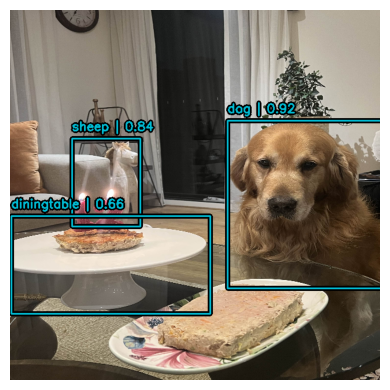

In [25]:
def visualize_predictions(image, predictions):
    # Convert to KerasCV expected format
    boxes = predictions["boxes"][0]
    classes = predictions["classes"][0]
    confidence = predictions["confidence"][0]

    # Filter out low-confidence predictions
    high_confidence_indices = tf.where(confidence > 0.5)
    boxes = tf.gather_nd(boxes, high_confidence_indices)
    classes = tf.gather_nd(classes, high_confidence_indices)
    confidence = tf.gather_nd(confidence, high_confidence_indices)

    # Visualize
    keras_cv.visualization.plot_bounding_box_gallery(
        tf.expand_dims(image, axis=0),
        value_range=(0, 255),
        bounding_box_format="xywh",
        y_true={"boxes": tf.expand_dims(boxes, axis=0), "classes": tf.expand_dims(classes, axis=0),
                "confidence": tf.expand_dims(confidence, axis=0)},
        scale=4,
        rows=1,
        cols=1,
        show=True,
        font_scale=0.7,
        class_mapping={
            0: "aeroplane",
            1: "bicycle",
            2: "bird",
            3: "boat",
            4: "bottle",
            5: "bus",
            6: "car",
            7: "cat",
            8: "chair",
            9: "cow",
            10: "diningtable",
            11: "dog",
            12: "horse",
            13: "motorbike",
            14: "person",
            15: "pottedplant",
            16: "sheep",
            17: "sofa",
            18: "train",
            19: "tvmonitor"
        }
    )


visualize_predictions(image.numpy().astype("uint8"), prediction)

In [11]:


import keras_cv
import tensorflow as tf

# Load model
backbone = keras_cv.models.YOLOV8Backbone.from_preset("yolo_v8_m_backbone_coco")

# Load and preprocess image
image = tf.keras.utils.load_img("test.jpeg")
image = tf.image.resize(image, (640, 640))
batch = tf.expand_dims(image, axis=0)

#output = backbone(batch)


model = keras_cv.models.YOLOV8Detector(
    backbone=backbone,
    num_classes=20,  # Replace with your dataset class count
    bounding_box_format='xywh'
)



TypeError: __init__() missing 1 required positional argument: 'bounding_box_format'

In [10]:
output.shape

TensorShape([1, 20, 20, 576])

In [9]:
def visualize_predictions(image, predictions):
    # Convert to KerasCV expected format
    boxes = predictions["boxes"][0]
    classes = predictions["classes"][0]
    confidence = predictions["confidence"][0]

    # Filter out low-confidence predictions
    high_confidence_indices = tf.where(confidence > 0.5)
    boxes = tf.gather_nd(boxes, high_confidence_indices)
    classes = tf.gather_nd(classes, high_confidence_indices)
    confidence = tf.gather_nd(confidence, high_confidence_indices)

    # Visualize
    keras_cv.visualization.plot_bounding_box_gallery(
        tf.expand_dims(image, axis=0),
        value_range=(0, 255),
        bounding_box_format="xywh",
        y_true=[{"boxes": boxes, "classes": classes, "confidence": confidence}],
        scale=4,
        rows=1,
        cols=1,
        show=True,
        font_scale=0.7,
        class_mapping=backbone.class_mapping
    )


visualize_predictions(image.numpy().astype("uint8"), output)

TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got 'boxes'